Aplicação do método do gradiente descendente no ajuste de uma reta y = ax +b. Ou seja, buscar valores de a e b que minimizem o erro num conjunto de pontos (x_i, y_i).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotx


In [2]:
plt.style.use(matplotx.styles.github["dark"])

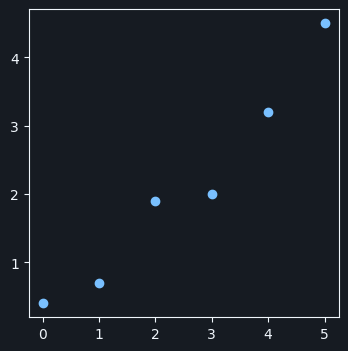

In [3]:
# Dados
x_ = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y_ = np.array([0.4, 0.7, 1.9, 2.0, 3.2, 4.5])

fig = plt.figure(figsize=(4,4))
plt.scatter(x_, y_)
plt.show()


$$erro = \sum_{i=1}^n (y_i - b - ax_i)^2$$


In [4]:
# Função para calcular o erro
def calcula_erro(a, b):
    soma = 0.0
    n = x_.shape[0]  # número de pontos
    for i in range(n):
        err = (y_[i] - (a * x_[i] + b))**2
        soma += err
    return soma / n  # erro médio

In [5]:
# Monta um grid com coordenadas a, b indo de -5 até 5 com espaçamento 0.1
a = np.arange(-2, 3, 0.1)
b = np.arange(-2, 3, 0.1)

aa, bb = np.meshgrid(a, b, sparse=True) #monta um grid (duas matrizes) nas coordenadas a, b

# Calcula o erro de todos os pontos do grid
erro = calcula_erro(aa, bb) 

# é calculado o erro da função 'calcula_erro' para cada ponto do grid, para depois ser possível mapear os pontos mínimos


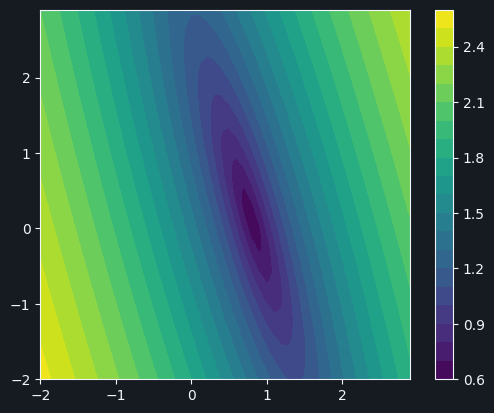

In [6]:
# Visualização do gráfico de contorno

z = np.power(erro, 0.2)
n_levels = 20
plt.contourf(a, b, z, n_levels)
plt.axis('scaled')
plt.colorbar()
plt.show()


#o gráfico mostra como varia o erro, por exemplo, na região roxa o erro é menor enquanto nas demais regiões ele é maior

#### Gradiente Descendente 

$$ \dfrac{\partial  erro}{\partial a} = 2 \sum_{i=1}^n (y_i - b - ax_i) (-x_i) = 0$$

$$ \dfrac{\partial  erro}{\partial b} = 2 \sum_{i=1}^n (y_i - b - ax_i) (-1) = 0$$

In [7]:
def calcula_da(a,b):
    soma = 0.0
    for i in range(x_.shape[0]):
        soma += -x_[i]*(y_[i] - b - (a*x_[i]))
    return 2*soma

def calcula_db(a,b):
    soma = 0.0
    for i in range(x_.shape[0]):
        soma += -(y_[i] - b - (a*x_[i]))
    return 2*soma

In [13]:
def grad_desc(a0, b0, tol, max_it, learning_rate):  #tolerancia -> pra saber se já convergeu, max_it -> iterações
    erro0 = calcula_erro(a0,b0)
    erros = [erro0]
    caminho = [[a0,b0]]
    
    for it in range(max_it):
        da = calcula_da(a0, b0)
        db = calcula_db(a0, b0)
        a1 = a0 - learning_rate*da
        b1 = b0 - learning_rate*db
        
        erro1 = calcula_erro(a1,b1)
        erros.append(erro1)
        caminho.append([a1, b1])
        
        if abs(a1-a0)<tol and abs(b1-b0)<tol: 
            print(f'Convergiu na iteração {it}')
            print(f'Erro atual={erro1:.3f}, delta erro = {erro1 - erro0}')
            break
        
        a0 = a1
        b0 = b1
        
        erro0 = erro1
        
    print(f'Solução a={a1:.3f}, b={b1:.3f}')
    return a0,b0,np.array(caminho),np.array(erros)

Convergiu na iteração 1726
Erro atual=0.098, delta erro = -1.792981069170807e-08
Solução a=0.802, b=0.112


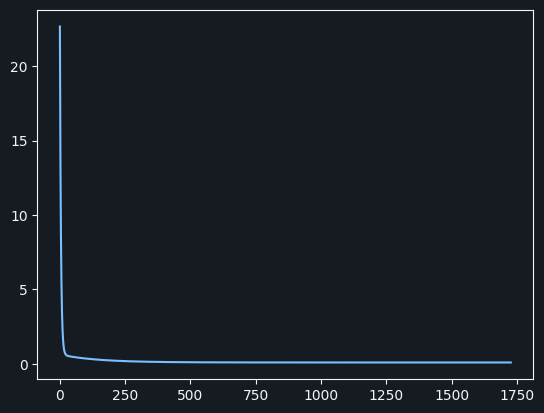

In [16]:
a0_gd, b0_gd, caminho, erros = grad_desc(-1, 1, 1e-5, 10000, 0.001)

interacao = np.linspace(0,erros.shape[0]-1, erros.shape[0])
plt.plot(interacao,erros)
plt.show()

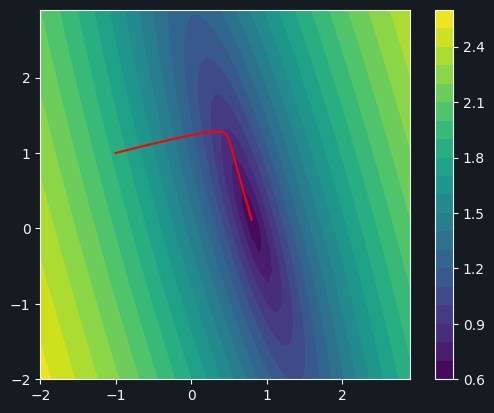

In [18]:
h = plt.contourf(a, b, z, n_levels)
plt.axis('scaled')
plt.plot(caminho[:,0], caminho[:,1], 'r')
plt.colorbar()
plt.show()